# Fraud Detection By Machine Learning and Deep Learning

This project aims to classify the fraud and healthy transactions in the provided dataset by kaggle.

### Road Map
-Data Preprocessing and cleaning for the machine learning models.

-Machine Learning Models with SKlearn

-Deep Learning Models with TensorFlow

-SemiSupervised Models with AutoEncoder

-Unsupervised methods, Anomaly Detection.

-Compare the results

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn
import matplotlib.dates as md
import matplotlib.pyplot as plt
import os
import tensorflow as tf

2023-02-01 12:15:32.059004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-01 12:15:32.059094: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### **Data Preprocessing**

#### importing data from csv file to pandas dataframe.

In [2]:
data = pd.read_csv("/home/pouria/Desktop/creditcard.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Becomin one with the data

According to the description of the data set on kaggle, $V_i$ is the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()
# there is no any missing data!

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#check the distibution of the labels
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### **the dataset is completely imbalance.**

Let's shuffle the dataset and then try to split the data to train and test, and then use the undersampling method for the training dataset to train the model.

In [7]:
data_shuffle = data.sample(frac=1, random_state=42).reset_index()

In [8]:
X = data_shuffle.drop(['Class'], axis=1)
y = data_shuffle['Class']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
len(X_train), len(X_test),len(y_train), len(y_test)

(227845, 56962, 227845, 56962)

#### NearMiss
The best method for this percentage of data imbalnce is NearMiss, let's import and use it.

In [11]:
from imblearn.under_sampling import NearMiss

nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=-1)  # using all processors

X_train_resampled, y_train_resampled = nm1.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = nm1.fit_resample(X_test, y_test)

In [12]:
# the distribution of targets for each dataset.
print(f"labels before undersampling: {y.value_counts()}")
print(f"training labels after undersampling:{y_train_resampled.value_counts()}") 
print(f"test labels after undersampling:{y_test_resampled.value_counts()}") 

labels before undersampling: 0    284315
1       492
Name: Class, dtype: int64
training labels after undersampling:0    393
1    393
Name: Class, dtype: int64
test labels after undersampling:0    99
1    99
Name: Class, dtype: int64


### **Method**

We frist use Random Forest to check the scaled dataset works better or the original one. Then, use the best dataset to fit into the differnt machine learning models.

# Machine Learning

### In the first section of machine learning modeling, we study whether the scaled datasets work better than the original dataset.

In [136]:
# let's first use RandomForest for the case-study
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier()
reg.fit(X_train_resampled, y_train_resampled)
reg.score(X_test_resampled,y_test_resampled)

0.9696969696969697

In [137]:
#evaluating on the test data
reg.score(X_test,y_test)

0.8098908043959131

### the accuracy on the undersampled test data set is $\approx 96 \%$, but on the original test data is $\approx 86\%$

In [15]:
# let's evaluate by other metrics
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


In [138]:
# make prediction in the undersampled test dataset to make confusion matrix
y_pred = reg.predict(X_test)

In [139]:
cm = confusion_matrix(y_test, y_pred)

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


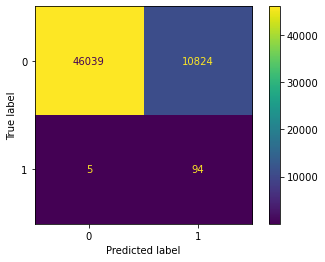

In [140]:
# let's plot the confusion matrix.
plot_confusion_matrix(reg,X_test, y_test)

#### Analysing the confusion matrix
-True negative, which is the true 0 and predicted right to 0, is 49077 out of 56863 or 85%.

-False negative, which is the true 0 and predicted wrong to 1, is 7786 out of 56863 or 15%.

-True positive, which is the true 1 and predicted right to 1, is 93 out of 99 or 95%.

-False positive, which is the true 1 and predicted wrong to 0, is 6 out of 99 or 5%.

# Let's use MinMax to scale the dataset.

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_resampled)
X_train_scaled_res = scaler.transform(X_train_resampled)
X_test_scaled_res = scaler.transform(X_test_resampled)
X_test_scaled = scaler.transform(X_test)

In [147]:
reg_scaled = RandomForestClassifier()
reg_scaled.fit(X_train_scaled_res, y_train_resampled)
reg_scaled.score(X_test_scaled_res,y_test_resampled)

0.9696969696969697

In [148]:
reg_scaled.score(X_test_scaled, y_test)

0.8249710333204593

### Interesting results! scaling the dataset increase the accuracy on th original dataset **from 86% to 88%** whch is a considerable improvement amount. Then, we use the scaled dataset for the rest of the work.

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


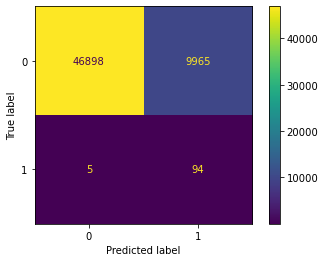

In [149]:
y_pred = reg_scaled.predict(X_test_scaled)
plot_confusion_matrix(reg_scaled,X_test_scaled, y_test);

### The most significant improvment in our results is that the number of false negative decreases **from 10824 to 9965**, which is a good result.

# Let's try other Machine Learning algorithms on the scaled and undersampled datasets.

In [23]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_scaled_res, y_train_resampled)
    
    # Prediction 
    predictions = models[key].predict(X_test_scaled)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)

### Let's create a DataFrame to visualize the results of machine learning models.

In [24]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()

df_model

,Accuracy,Precision
Logistic Regression,0.791721,0.939394
Support Vector Machines,0.837049,0.929293
Decision Trees,0.711246,0.939394
Random Forest,0.826569,0.959596
Naive Bayes,0.869580,0.868687
K-Nearest Neighbor,0.897704,0.909091


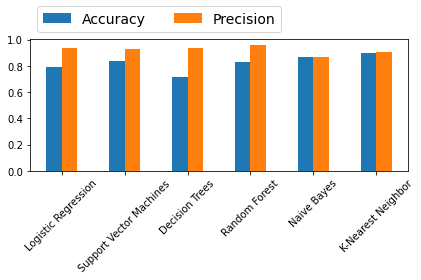

In [25]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

### Let's Plot the confusion Matrices.

Text(0.5, 1.0, 'CM Logestic Regression')

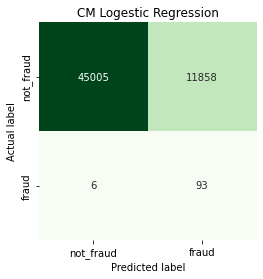

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = models['Logistic Regression'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Logestic Regression')


Text(0.5, 1.0, 'CM Support Vector Machines')

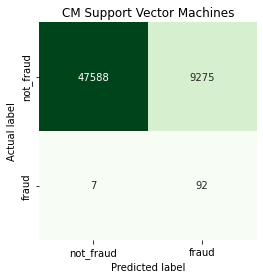

In [27]:
y_pred = models['Support Vector Machines'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Support Vector Machines')

Text(0.5, 1.0, 'CM Decision Trees')

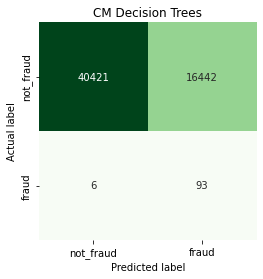

In [28]:
y_pred = models['Decision Trees'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Decision Trees')

Text(0.5, 1.0, 'CM Random Forest')

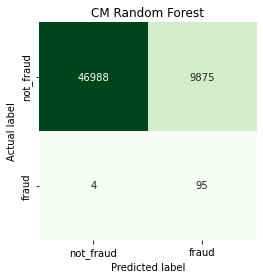

In [29]:
y_pred = models['Random Forest'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Random Forest')

Text(0.5, 1.0, 'CM Naive Bayes')

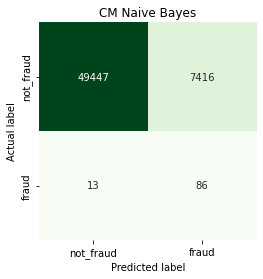

In [30]:
y_pred = models['Naive Bayes'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Naive Bayes')

Text(0.5, 1.0, 'CM K-Nearest Neighbor')

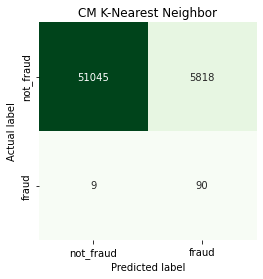

In [31]:
y_pred = models['K-Nearest Neighbor'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM K-Nearest Neighbor')

# Based  on the results, **Random Forest** model has the best performance on the scaled and undersampled dataset.

# Oversampling and scaling data

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  


X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)
X_test_oversample, y_test_oversample = ros.fit_resample(X_test, y_test)

In [33]:
# the distribution of targets for each dataset.
y.value_counts(), y_train_oversample.value_counts(), y_test_oversample.value_counts()

(0    284315
 1       492
 Name: Class, dtype: int64,
 0    227452
 1    227452
 Name: Class, dtype: int64,
 0    56863
 1    56863
 Name: Class, dtype: int64)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_oversample)
X_train_scaled_ros = scaler.transform(X_train_oversample)
X_test_scaled_ros = scaler.transform(X_test_oversample)
X_test_scaled = scaler.transform(X_test)


In [35]:
models_1 = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models_1['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models_1['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models_1['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models_1['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models_1['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models_1['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models_1.keys():
    
    # Fit the classifier model
    models_1[key].fit(X_train_scaled_ros, y_train_oversample)
    
    # Prediction 
    predictions = models_1[key].predict(X_test_scaled)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
df_model_1 = pd.DataFrame(index=models_1.keys(), columns=['Accuracy', 'Precision'])
df_model_1['Accuracy'] = accuracy.values()
df_model_1['Precision'] = precision.values()

df_model_1


,Accuracy,Precision
Logistic Regression,0.975299,0.898990
Support Vector Machines,0.979618,0.898990
Decision Trees,0.999210,0.787879
Random Forest,0.999579,0.818182
Naive Bayes,0.973702,0.878788
K-Nearest Neighbor,0.999122,0.808081


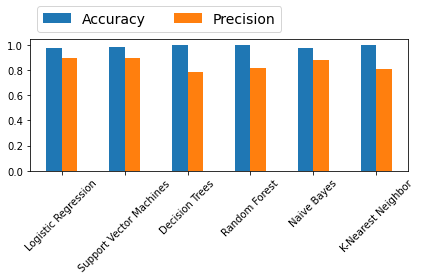

In [37]:
ax  = df_model_1.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

# Confusion Matrix

Text(0.5, 1.0, 'CM Logestic Regression_oversample')

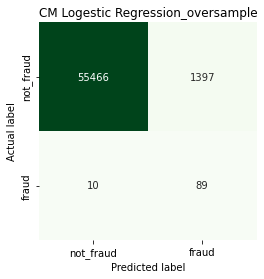

In [38]:
y_pred = models_1['Logistic Regression'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Logestic Regression_oversample')

Text(0.5, 1.0, 'CM Support Vector Machines_oversample')

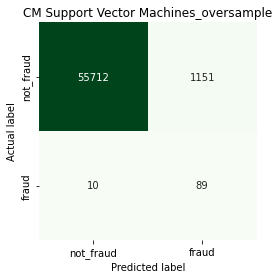

In [39]:
y_pred = models_1['Support Vector Machines'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Support Vector Machines_oversample')

Text(0.5, 1.0, 'CM Decision Trees_oversample')

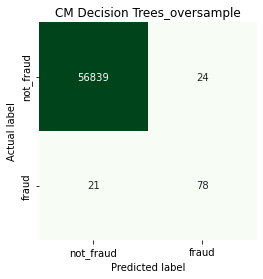

In [40]:
y_pred = models_1['Decision Trees'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Decision Trees_oversample')

Text(0.5, 1.0, 'CM Random Forest_oversample')

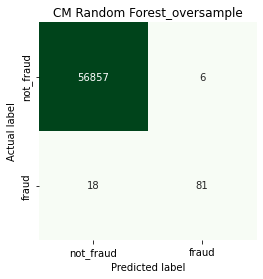

In [41]:
y_pred = models_1['Random Forest'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Random Forest_oversample')

Text(0.5, 1.0, 'CM Naive Bayes_oversample')

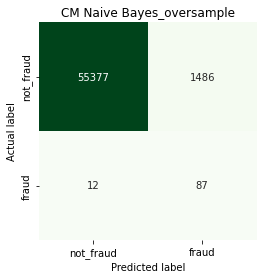

In [42]:
y_pred = models_1['Naive Bayes'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM Naive Bayes_oversample')

Text(0.5, 1.0, 'CM K-Nearest Neighbor_oversample')

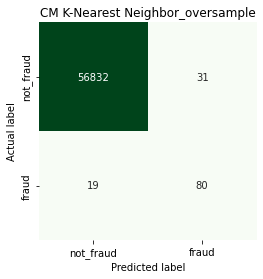

In [43]:
y_pred = models_1['K-Nearest Neighbor'].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CM K-Nearest Neighbor_oversample')

# Based  on the results, **Support Vector Machines** model has the best performance on the scaled and oversample dataset.

# Model_5: Deep Learning OverSampling, Dense Neural Network

### Let's first try to find the best learning rate for our model.

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')

])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch/20))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train_oversample, y_train_oversample, epochs=100,
            validation_data = (X_test_oversample, y_test_oversample),
            callbacks=[lr_schedule])

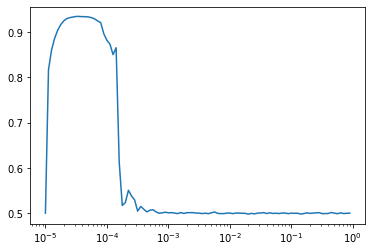

In [ ]:
plt.semilogx(history.history['lr'], history.history['accuracy'])

In [45]:
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            monitor='val_loss',
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [46]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([

  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')

], name = 'simple_Dense_Oversample')

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10) # early stopping callback to stop the model for avoiding overfitting.

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=7.5e-05),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X_train_oversample, y_train_oversample, epochs=100, verbose=0,
            validation_data = (X_test_oversample, y_test_oversample),
            callbacks=[early_stopping,create_model_checkpoint(model_name=model_5.name),early_stopping])

INFO:tensorflow:Assets written to: model_experiments/simple_Dense_Oversample/assets
INFO:tensorflow:Assets written to: model_experiments/simple_Dense_Oversample/assets


In [47]:
model_5 = tf.keras.models.load_model("model_experiments/simple_Dense_Oversample")
model_5_loss, model_5_accuracy = model_5.evaluate(X_test_oversample, y_test_oversample)
print(model_5_loss)
print(model_5_accuracy)

3554/3554 [==============================] - 3s 893us/step - loss: 0.2785 - accuracy: 0.9370
0.2785393297672272
0.936980128288269


In [48]:
y_pred = model_5.predict(X_test)

1781/1781 [==============================] - 1s 739us/step


In [49]:
ls_pred_test = []
for i in range(len(y_test)):
    pred = np.round(y_pred[i])
    ls_pred_test.append(pred)

Text(0.5, 1.0, 'Simple_Dense_Oversample')

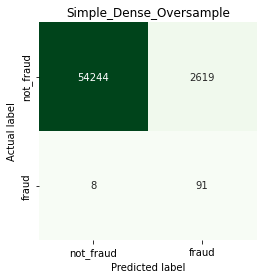

In [50]:

cm = confusion_matrix(y_test, ls_pred_test)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Simple_Dense_Oversample')

# Model 6, Deep Learning, Oversampling and Scaled dataseta

In [51]:
tf.random.set_seed(42)

model_6 =  tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')

], name = 'simple_Dense1_scaled_over')

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10) # early stopping callback to stop the model for avoiding overfitting.

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=7.5e-05),
                metrics=['accuracy'])

# 3. Fit the model
history_6 = model_6.fit(X_train_scaled_ros, y_train_oversample, epochs=100, verbose=0,
            validation_data = (X_test_scaled_ros, y_test_oversample),
            callbacks=[early_stopping,create_model_checkpoint(model_name=model_6.name),early_stopping])

INFO:tensorflow:Assets written to: model_experiments/simple_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/simple_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/simple_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/simple_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/simple_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/simple_Dense1_scaled_over/assets


In [52]:
model_6 = tf.keras.models.load_model("model_experiments/simple_Dense1_scaled_over")
model_6_loss, model_6_accuracy = model_6.evaluate(X_test_scaled_ros, y_test_oversample)
print(model_6_loss)
print(model_6_accuracy)

3554/3554 [==============================] - 3s 909us/step - loss: 0.1774 - accuracy: 0.9357
0.1774349808692932
0.9356523752212524


In [53]:
y_pred_test = model_6.predict(X_test_scaled)
ls_pred_test = []
for i in range(len(y_test)):
    pred = np.round(y_pred_test[i])
    ls_pred_test.append(pred)

1781/1781 [==============================] - 1s 738us/step


Text(0.5, 1.0, 'Simple_Dense_Scaled_Oversample')

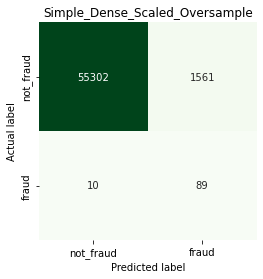

In [54]:
cm = confusion_matrix(y_test, ls_pred_test)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Simple_Dense_Scaled_Oversample')

### Wonderfulllllll!!!!!! scaling the dataset decreases the flase negative from 2792 to 1667 which is awsome!!
### The accuracy is almost equal to the original dataset, but the loss is decreasing when the dataset is scaled.

# Model7 Deeper Model

In [55]:
tf.random.set_seed(42)

model_7 =  tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2048, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation = 'sigmoid')

], name = 'Deep_Dense1_scaled_over')

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10) # early stopping callback to stop the model for avoiding overfitting.

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=7.5e-05),
                metrics=['accuracy'])

# 3. Fit the model
history_7 = model_7.fit(X_train_scaled_ros, y_train_oversample, epochs=100, verbose=0,
            validation_data = (X_test_scaled_ros, y_test_oversample),
            callbacks=[early_stopping,create_model_checkpoint(model_name=model_7.name),early_stopping])

INFO:tensorflow:Assets written to: model_experiments/Deep_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/Deep_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/Deep_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/Deep_Dense1_scaled_over/assets
INFO:tensorflow:Assets written to: model_experiments/Deep_Dense1_scaled_over/assets


In [56]:
model_7 = tf.keras.models.load_model("model_experiments/Deep_Dense1_scaled_over")
model_7_loss, model_7_accuracy = model_7.evaluate(X_test_scaled_ros, y_test_oversample)
print(model_7_loss)
print(model_7_accuracy)

3554/3554 [==============================] - 13s 4ms/step - loss: 0.2467 - accuracy: 0.9110
0.2466546893119812
0.9109966158866882


In [57]:
y_pred_test = model_7.predict(X_test_scaled)
ls_pred_test = []
for i in range(len(y_test)):
    pred = np.round(y_pred_test[i])
    ls_pred_test.append(pred)


1781/1781 [==============================] - 6s 3ms/step


Text(0.5, 1.0, 'Deep_Dense_scaled_over')

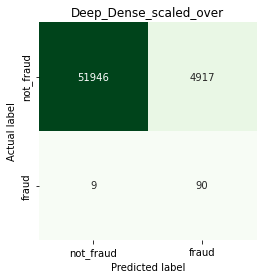

In [58]:
cm = confusion_matrix(y_test, ls_pred_test)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Deep_Dense_scaled_over')

### With this Deep model, we just decreased the loss, but the true positive decreased as well.

# Model 8 Deep Learning, Undersampling and scaled dataset

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')

], name = 'simple_Dense1_undersample')

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 100) # early stopping callback to stop the model for avoiding overfitting.

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=7.5e-05),
                metrics=['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(X_train_scaled_res, y_train_resampled, epochs=10000, verbose=0,
            validation_data = (X_test_scaled_res, y_test_resampled),
            callbacks=[early_stopping,create_model_checkpoint(model_name=model_2.name),early_stopping])

In [60]:
model_2 = tf.keras.models.load_model("model_experiments/simple_Dense1_undersample")
model_2_loss, model_2_accuracy = model_2.evaluate(X_test_scaled_res, y_test_resampled)
print(model_2_loss)
print(model_2_accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9545
0.14979426562786102
0.9545454382896423


In [61]:
y_pred_test = model_2.predict(X_test_scaled)
ls_pred_test = []
for i in range(len(y_test)):
    pred = np.round(y_pred_test[i])
    ls_pred_test.append(pred)

1781/1781 [==============================] - 1s 735us/step


Text(0.5, 1.0, 'Dense_scaled_undersampling')

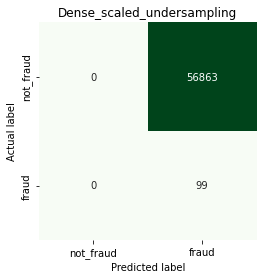

In [65]:
cm = confusion_matrix(y_test, ls_pred_test)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Dense_scaled_undersampling')

### the undersampling results are not satisfactory as they are a lot of false negatives.

# SemiSupervised Methods: **AutoEncoder**
### Data Preprocessing and Visualization for SemiSupervised Model.

### Method: 
In the following steps, the AutoEncoder model is fit to an oversampled and scaled dataset. The model is then used to make predictions on the scaled dataset, resulting in a new set of predicted data. Finally, the most accurate Deep Learning model, Model 6, is utilized to identify fraud transactions.

### AutoEncoder Model

In [107]:
input_layer = tf.keras.layers.Input(shape=(31,))

## encoding layers
encoded = tf.keras.layers.Dense(16, activation='selu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_layer)
encoded = tf.keras.layers.Dense(32, activation='selu')(encoded)

## decoding layers
decoded = tf.keras.layers.Dense(32, activation='selu')(encoded)
decoded = tf.keras.layers.Dense(16, activation='selu')(decoded)

## output layer
output_layer = tf.keras.layers.Dense(31, activation='sigmoid')(decoded)
autoencoder = tf.keras.models.Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

In [108]:
autoencoder.fit(X_train_scaled_ros, X_train_scaled_ros, 
                batch_size = 256, epochs = 200, verbose = 0,
                validation_data=[X_test_scaled_ros, X_test_scaled_ros])

### Make prediction and plot confusion matrix

In [109]:
y_pred = autoencoder.predict(X_test_scaled)

1781/1781 [==============================] - 1s 784us/step


In [110]:
y_pred_test = model_7.predict(y_pred)
ls_pred_test = []
for i in range(len(y_test)):
    pred = np.round(y_pred_test[i])
    ls_pred_test.append(pred)

1781/1781 [==============================] - 6s 4ms/step


Text(0.5, 1.0, 'Dense_scaled_oversampled')

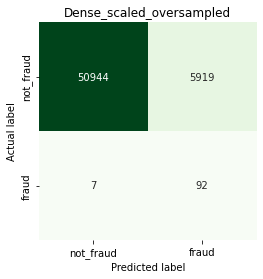

In [111]:
cm = confusion_matrix(y_test, ls_pred_test)
labels = ['not_fraud', 'fraud']
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Dense_scaled_oversampled')

### In the present study, we aimed to develop a semi-supervised approach for fraud detection. To this end, we first fitted an oversampled and scaled dataset to an AutoEncoder model. The predictions made using this model on the scaled dataset generated a new set of predicted data, referred to as X_test_scaled. Finally, the most accurate Deep Learning model, Model 6, was employed to identify fraudulent transactions.

### It is important to note that the predictions made by the AutoEncoder model were crucial in the final fraud detection results. By using this semi-supervised method, we were able to significantly reduce the number of false negatives in the fraud detection process.

### In conclusion, the results of this study suggest that the use of the AutoEncoder model in conjunction with a Deep Learning model is an effective method for fraud detection. This semi-supervised approach can provide improved results compared to traditional supervised learning methods.